# Raw Source Data Loading

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
folder_path = 'C:/Users/26011/Downloads/IMDB/' #change it for your personal use
# input_path = folder_path + 'combined_dat_feature_engineered.csv'
movie_dat_path = folder_path + 'IMDB_movie_details.json'
review_dat_path = folder_path + 'IMDB_reviews.json'
# combined_dat = pd.read_csv(input_path)
movie_dat = pd.read_json(movie_dat_path,lines=True)
review_dat = pd.read_json(review_dat_path, lines=True)

In [12]:
# if running on local, use your own dir
# import os
# import sys
# currentdir = os.getcwd()
# parentdir = os.path.dirname(parentdir)
# folder_path = currentdir + '/IMDB/'

In [13]:
# print(currentdir)

C:\Users\26011\Downloads


In [14]:
#subject to where you store the dataset
folder_path = '/content/drive/My Drive/CS3244 Project/IMDB/'

movie_path = folder_path + 'IMDB_movie_details.json'
review_path = folder_path + 'IMDB_reviews.json'
movie_dat = pd.read_json(movie_path,lines=True)
review_dat = pd.read_json(review_path,lines=True)

MemoryError: 

# Exploartory Data Analysis

In [5]:
review_dat.isna().sum()

review_date       0
movie_id          0
user_id           0
is_spoiler        0
review_text       0
rating            0
review_summary    0
dtype: int64

In [6]:
movie_dat.isna().sum()

movie_id         0
plot_summary     0
duration         0
genre            0
rating           0
release_date     0
plot_synopsis    0
dtype: int64

In [7]:
review_dat.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [8]:
print(f'shape of review data: {review_dat.shape}')
print(f'shape of movie data: {movie_dat.shape}')

shape of review data: (573913, 7)
shape of movie data: (1572, 7)


In [9]:
movie_dat.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [10]:
review_dat.movie_id.nunique()
# review dat matches the movie dat

1572

In [11]:
movie_dat['genre'].value_counts()

[Action, Adventure, Sci-Fi]    68
[Comedy, Drama, Romance]       58
[Drama, Romance]               50
[Comedy]                       49
[Drama]                        49
                               ..
[Drama, Fantasy, Mystery]       1
[Action, Drama, Music]          1
[Comedy, Crime, Musical]        1
[Comedy, Drama, Sport]          1
[Comedy, Mystery, Sci-Fi]       1
Name: genre, Length: 237, dtype: int64

# Feature Engineering

In [12]:
movie_dat['release_date'] = pd.to_datetime(movie_dat['release_date'])
movie_dat['release_year'] = movie_dat['release_date'].dt.year
movie_dat['release_year_month'] = movie_dat['release_date'].dt.strftime('%Y-%m')
# movie_dat['release_year_month'].value_counts()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 [Text(0, 0, '1921'),
  Text(1, 0, '1925'),
  Text(2, 0, '1927'),
  Text(3, 0, '1928'),
  Text(4, 0, '1931'),
  Text(5, 0, '1934'),
  Text(6, 0, '1936'),
  Text(7, 0, '1939'),
  Text(8, 0, '1940'),
  Text(9, 0, '1941'),
  Text(10, 0, '1943'),
  Text(11, 0, '1944'),
  Text(12, 0, '1947'),
  Text(13, 0, '1948'),
  Text(14, 0, '1949'),
  Text(15, 0, '1950'),
  Text(16, 0, '1951'),
  Text(17, 0, '1952'),
  Text(18, 0, '1954'),
  Text(19, 0, '1955'),
  Text(20, 0, '1956'),
  Text(21, 0, '1957'),
  Text(22, 0, '1958'),
  Text(23, 0, '1959'),
  Text(24, 0, '1960'),
  Text(25, 0, '1961'),
  Text(26, 0, '1962'),
  Text(27, 0, '1963'),
  Text(28, 0

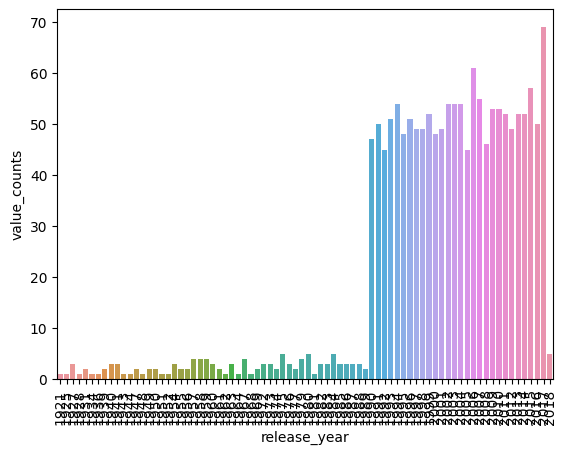

In [13]:
# release date visualization
date_count = pd.DataFrame(movie_dat['release_year'].value_counts())
date_count = date_count.reset_index()
date_count = date_count.rename(columns = {'index':'release_year','release_year':'value_counts'})
sns.barplot(x=date_count['release_year'],y=date_count['value_counts'])
plt.xticks(rotation=90)
# plt.figure(figsize=(100,6))

In [14]:
#dummify genre
from itertools import chain
nested_genre_lst = list(movie_dat['genre'])
flattened_genre_lst = list(chain.from_iterable(nested_genre_lst))
genre_set = set(flattened_genre_lst)
unique_genre_lst = list(genre_set)

In [15]:
print(f'unique_genre_list: {unique_genre_lst}')

unique_genre_list: ['Animation', 'Comedy', 'Drama', 'Sci-Fi', 'Biography', 'Mystery', 'Romance', 'History', 'Fantasy', 'Music', 'War', 'Sport', 'Film-Noir', 'Horror', 'Western', 'Adventure', 'Family', 'Crime', 'Musical', 'Thriller', 'Action']


In [16]:
for i in unique_genre_lst:
    dummy_name = 'genre_'+i
    movie_dat[dummy_name] = movie_dat['genre'].apply(lambda x: 1 if i in x else 0)
movie_dat.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis,release_year,release_year_month,genre_Animation,genre_Comedy,genre_Drama,genre_Sci-Fi,genre_Biography,genre_Mystery,genre_Romance,genre_History,genre_Fantasy,genre_Music,genre_War,genre_Sport,genre_Film-Noir,genre_Horror,genre_Western,genre_Adventure,genre_Family,genre_Crime,genre_Musical,genre_Thriller,genre_Action
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in...",1992,1992-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...,2013,2013-11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,,2002,2002-04,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...,1948,1948-01,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...,1999,1999-05,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


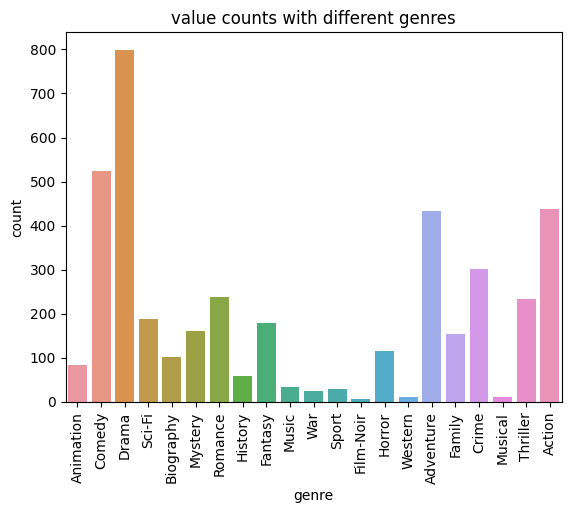

In [17]:
# visualize the distribution of genres
def genre_barplot(movie_dat):
    visual_dict = {'genre':[],'count':[]}
    for i in unique_genre_lst:
        visual_dict['genre'].append(i)
        dummy_name = 'genre_'+i
        visual_dict['count'].append(sum(movie_dat[dummy_name]))
    visual_df = pd.DataFrame(visual_dict)
    sns.barplot(x=visual_df['genre'],y=visual_df['count'])
    plt.xticks(rotation=90)
    plt.title('value counts with different genres')
genre_barplot(movie_dat)

In [18]:
combined_dat = review_dat.merge(movie_dat, on='movie_id',how='left')
combined_dat.shape

(573913, 36)

In [19]:
combined_dat['is_spoiler'].value_counts()
## highly imbalanced data , need to use SMOTE or oversampling to augment positive class

False    422989
True     150924
Name: is_spoiler, dtype: int64

# Text Cleaning, Tokenization and Word Embedding

Text Data preprocessing step:
1. remove punctuations
2. remove stopwords
3. lowercase the text
4. tokenization
5. stemming and lemmatization

Word Embedding:

transform words (texts) into vectors, used as the input training data for any model

Reference:

https://github.com/SpencerPao/Natural-Language-Processing/tree/main/Text_Preprocessing

## Remove Punctuations

In [20]:
text_cols = ['review_text','review_summary','plot_summary','plot_synopsis']

In [21]:
def remove_punctuation(text):
    return text.str.replace(r'[^\w\s]+', '')
combined_dat[text_cols] = combined_dat[text_cols].apply(lambda x: remove_punctuation(x))

<ipython-input-21-6ceab5bfefba>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  return text.str.replace(r'[^\w\s]+', '')


## To Lowercase

In [ ]:
for i in text_cols:
    combined_dat[i] = combined_dat[i].str.lower()

## Remove Stopwords

In [ ]:
## pre-define a stopword list, retrieved from https://www.ranks.nl/stopwords
# stopword_path = folder_path + 'stopwords.txt'
# stopwords = pd.read_csv(stopword_path,header = None)
# stopwords.rename(columns={0:'Stopwords'}, inplace = True)
# stopwords_lst = list(stopwords['Stopwords'])

In [ ]:
# def remove_stopwords(text, stopwords_lst):
#   return text.apply(lambda x: [x for x in text if x not in stopwords_lst])
# combined_dat[text_cols] = combined_dat[text_cols].apply(lambda x: remove_stopwords(x, stopwords_lst))

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('English'))


In [ ]:
def remove_stopwords(text,stop_words):
    token_lst = text.split()
    filtered_tokens = [word for word in token_lst if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filterd_text
## apply to combined dataframe
combined_dat[text_cols] = combined_dat[text_cols].apply(lambda x: remove(x,stop_words))

In [ ]:
## for simplicity, we save the result after removing stopwords, the time taken for running the above code is too long.
result_path = folder_path + 'combined_after_engineering.csv'
combined_dat.to_csv(result_path)

## Tokenization

## Lemmatization